In [1]:
using DataFrames
using Plots
using Polynomials
using Printf
using QuadGK

In [6]:
function legendre(n)
        if n == 0
            return Poly([1])
        elseif n == 1
            return Poly([0,1])
        else
        return (2*n-1) / n * Poly([0,1]) * legendre(n-1) - (n-1) / n * legendre(n-2)
        end;
    end;

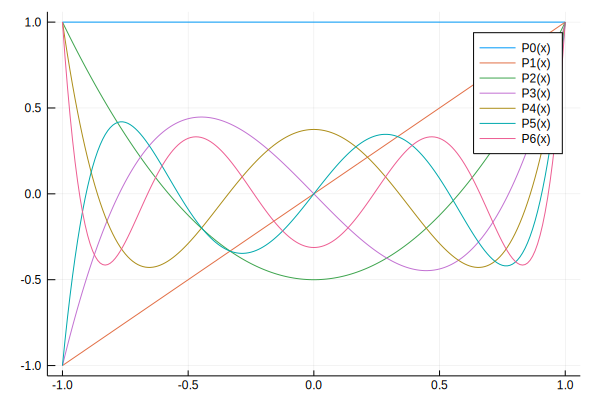

In [8]:
x = collect(-1:0.01:1)
plot(x,legendre(0)(x), label="P0(x)")
plot!(x,legendre(1)(x), label="P1(x)")
plot!(x,legendre(2)(x), label="P2(x)")
plot!(x,legendre(3)(x), label="P3(x)")
plot!(x,legendre(4)(x), label="P4(x)")
plot!(x,legendre(5)(x), label="P5(x)")
plot!(x,legendre(6)(x), label="P6(x)")

In [11]:
print("n = 2\n")
print("Roots legendre: ", roots(legendre(2)), 
      "\nRoots Gauss: ", gauss(2)[1], "\n\n")
print("n = 3\n")
print("Roots legendre: ", roots(legendre(3)), 
      "\nRoots Gauss: ", gauss(3)[1], "\n\n")
print("n = 4\n")
print("Roots legendre: ", roots(legendre(4)), 
      "\nRoots Gauss: ", gauss(4)[1], "\n\n")

n = 2
Roots legendre: [-0.57735, 0.57735]
Roots Gauss: [-0.57735, 0.57735]

n = 3
Roots legendre: [-0.774597, 0.774597, 0.0]
Roots Gauss: [-0.774597, 0.0, 0.774597]

n = 4Roots legendre: [-0.861136, 0.861136, -0.339981, 0.339981]
Roots Gauss: [-0.861136, -0.339981, 0.339981, 0.861136]



In [2]:
function integralGauss(f, k)
    (xs, a) = gauss(k)
    return sum(a .* f.(xs))
end

integralGauss (generic function with 1 method)

In [9]:
f(x) = (100 * x^25) + (3 * x^2) + 1
expected1 = 4
gausResult1 = DataFrame(k=Int[], Result=String[], Absolute_error=String[], Relative_error=String[])
println("Expected: ", expected1, "\nGauss: \n")
for k in range(1,20)
    res = integralGauss(f, k)
    push!(gausResult1, 
            [k, 
             @sprintf("%.10E", res), 
             @sprintf("%.10E", abs(expected1-res)), 
             @sprintf("%.10E", abs(expected1-res)/expected1)]
    )
end;
gausResult1

Expected: 4
Gauss: 



,k,Result,Absolute_error,Relative_error
,Int64,String,String,String
1,1,2.0000000000E+00,2.0000000000E+00,5.0000000000E-01
2,2,4.0000000000E+00,0.0000000000E+00,0.0000000000E+00
3,3,4.0000000000E+00,0.0000000000E+00,0.0000000000E+00
4,4,4.0000000000E+00,0.0000000000E+00,0.0000000000E+00
5,5,4.0000000000E+00,4.4408920985E-16,1.1102230246E-16
6,6,4.0000000000E+00,0.0000000000E+00,0.0000000000E+00
7,7,4.0000000000E+00,8.8817841970E-16,2.2204460493E-16
8,8,4.0000000000E+00,1.7763568394E-15,4.4408920985E-16
9,9,4.0000000000E+00,0.0000000000E+00,0.0000000000E+00


In [10]:
function gaussIntegral(f, a, b, k=10)
    (xi, ai) = gauss(k)
    return sum(ai .* (b-a)/2 .* f.((b-a)/2 * xi + [(b+a)/2 for i in range(0,k-1)]))
end

gaussIntegral (generic function with 2 methods)

In [12]:
gausResult2 = DataFrame(k=Int[], Result=String[], Absolute_error=String[], Relative_error=String[])
f(x) = (100 * x^25) + (3 * x^2) + 1    # Integral on [-1,2] is equal to F(2)-F(-1) = 33554442+3 = 33554445, F(x) = x^25+x^3+x
expected2 = 20
a = -2
b = 2
println("Expected: ", expected2, ".\n\n",
        "Actual:\n")
for k in range(1,20)
    res = gaussIntegral(f, a, b, k)
    push!(gausResult2, 
            [k, 
             @sprintf("%.10E", res), 
             @sprintf("%.10E", abs(expected2-res)), 
             @sprintf("%.10E", abs(expected2-res)/expected2)]
    )
end
gausResult2

Expected: 20.

Actual:



,k,Result,Absolute_error,Relative_error
,Int64,String,String,String
1,1,4.0000000000E+00,1.6000000000E+01,8.0000000000E-01
2,2,2.0000000000E+01,0.0000000000E+00,0.0000000000E+00
3,3,2.0000000001E+01,9.3132257462E-10,4.6566128731E-11
4,4,1.9999999993E+01,7.4505805969E-09,3.7252902985E-10
5,5,1.9999999970E+01,2.9802322388E-08,1.4901161194E-09
6,6,2.0000000000E+01,0.0000000000E+00,0.0000000000E+00
7,7,1.9999999970E+01,2.9802322388E-08,1.4901161194E-09
8,8,2.0000000060E+01,5.9604644775E-08,2.9802322388E-09
9,9,1.9999999970E+01,2.9802322388E-08,1.4901161194E-09


In [13]:
function printQuadGK(f, a, b, expected)
    (res, err) = quadgk(f, a, b)
    println("Expected: ", expected, 
        "\nQuadGK: ", @sprintf("%.12E", res), 
        "\nQuad Max Error: ", @sprintf("%.12E", err), 
        "\nAbsolute Error: ", @sprintf("%.12E", abs(expected-res)), 
        "\nRelative Error: ", @sprintf("%.12E", abs(expected-res)/expected),
        "\n\n")
end

printQuadGK (generic function with 1 method)

In [15]:
f(x) = (100 * x^25) + (3 * x^2) + 1  
printQuadGK(f, -1, 1, 4)          
printQuadGK(f, -2, 2, 20)   

Expected: 4
QuadGK: 4.000000000000E+00
Quad Max Error: 0.000000000000E+00
Absolute Error: 1.021405182655E-14
Relative Error: 2.553512956638E-15


Expected: 20
QuadGK: 1.999999931685E+01
Quad Max Error: 1.448294995043E-08
Absolute Error: 6.831466912161E-07
Relative Error: 3.415733456080E-08




In [16]:
standard_gauss(x) =  1 / sqrt(2*pi) * Base.MathConstants.e^(-x^2/2)
printQuadGK(standard_gauss, -Inf, Inf, 1)

Expected: 1
QuadGK: 1.000000000003E+00
Quad Max Error: 1.439558494150E-08
Absolute Error: 3.258282532670E-12
Relative Error: 3.258282532670E-12




In [17]:
function simpsonIntegral(f, a, b, n=100)
    res = 0
    h = (b-a) / n
    for i in range(0,n-1)
        xi = a + i*h
        res += 1/6 * h * (f(xi) + 4 * f(xi+h/2) + f(xi+h))
    end
    return res
end

simpsonIntegral (generic function with 2 methods)

In [23]:
simpsonResults = DataFrame(n=Int[], Result=String[], Absolute_error=String[], Relative_error=String[])
f(x) = (100 * x^25) + (3 * x^2) + 1    # Integral on (-1,2) is equal to F(2)-F(-1) = 33554442+3 = 33554445, F(x) = x^25+x^3+x
simpsonExpected = 20
a = -2
b = 2
min_n = 10
max_n = 200
for n in range(min_n,max_n)
    res = simpsonIntegral(f, a, b, n)
    push!(simpsonResults, 
            [n, 
             @sprintf("%.10E", res), 
             @sprintf("%.10E", abs(simpsonExpected-res)), 
             @sprintf("%.10E", abs(simpsonExpected-res)/simpsonExpected)]
    )
end
print(simpsonResults)

191×4 DataFrame
│ Row │ n     │ Result           │ Absolute_error   │ Relative_error   │
│     │ Int64 │ String           │ String           │ String           │
├─────┼───────┼──────────────────┼──────────────────┼──────────────────┤
│ 1   │ 10    │ 1.9999999881E+01 │ 1.1920928955E-07 │ 5.9604644775E-09 │
│ 2   │ 11    │ 2.0000001609E+01 │ 1.6093254089E-06 │ 8.0466270447E-08 │
│ 3   │ 12    │ 1.9999999523E+01 │ 4.7683715820E-07 │ 2.3841857910E-08 │
│ 4   │ 13    │ 1.9999999970E+01 │ 2.9802322388E-08 │ 1.4901161194E-09 │
│ 5   │ 14    │ 1.9999998420E+01 │ 1.5795230865E-06 │ 7.8976154327E-08 │
│ 6   │ 15    │ 2.0000000030E+01 │ 2.9802322388E-08 │ 1.4901161194E-09 │
│ 7   │ 16    │ 2.0000000000E+01 │ 0.0000000000E+00 │ 0.0000000000E+00 │
│ 8   │ 17    │ 1.9999999970E+01 │ 2.9802322388E-08 │ 1.4901161194E-09 │
│ 9   │ 18    │ 2.0000000030E+01 │ 2.9802322388E-08 │ 1.4901161194E-09 │
│ 10  │ 19    │ 1.9999998778E+01 │ 1.2218952179E-06 │ 6.1094760895E-08 │
│ 11  │ 20    │ 2.0000001460E+01 │ 

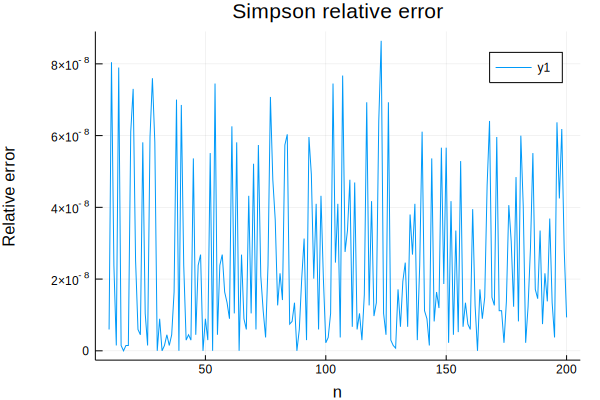

In [24]:
plot(simpsonResults[:n], 
     map(x->parse(Float64,x), simpsonResults[:Relative_error]), 
     xlabel="n",
     ylabel="Relative error",
     title="Simpson relative error"
)

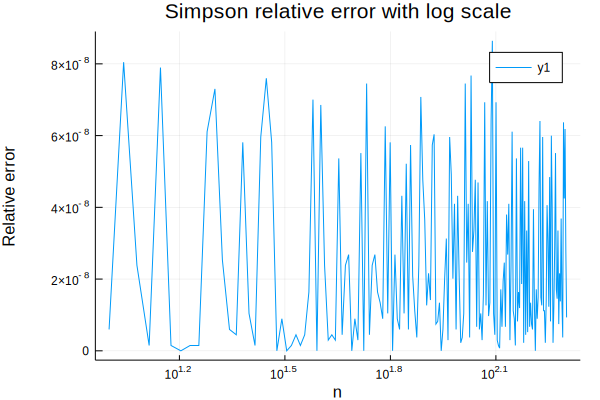

In [22]:
plot(simpsonResults[:n], 
     map(x->parse(Float64,x), simpsonResults[:Relative_error]), 
     xlabel="n",
     ylabel="Relative error",
     xaxis=:log,
     title="Simpson relative error with log scale"
)

In [29]:
simpsonResults = DataFrame(n=Int[], Result=String[], Absolute_error=String[], Relative_error=String[])
g(x) = 5 * x^3 - 12 * x^2 + x + 5
expected = -44
a = -2
b = 2
min_n = 1
max_n = 200
for n in range(min_n,max_n)
    res = simpsonIntegral(g, a, b, n)
    push!(simpsonResults, 
            [n, 
             @sprintf("%.10E", res), 
             @sprintf("%.10E", abs(expected-res)), 
             @sprintf("%.10E", abs(expected-res)/expected)]
    )
end
print(simpsonResults)

200×4 DataFrame
│ Row │ n     │ Result            │ Absolute_error   │ Relative_error    │
│     │ Int64 │ String            │ String           │ String            │
├─────┼───────┼───────────────────┼──────────────────┼───────────────────┤
│ 1   │ 1     │ -4.4000000000E+01 │ 0.0000000000E+00 │ -0.0000000000E+00 │
│ 2   │ 2     │ -4.4000000000E+01 │ 0.0000000000E+00 │ -0.0000000000E+00 │
│ 3   │ 3     │ -4.4000000000E+01 │ 7.1054273576E-15 │ -1.6148698540E-16 │
│ 4   │ 4     │ -4.4000000000E+01 │ 0.0000000000E+00 │ -0.0000000000E+00 │
│ 5   │ 5     │ -4.4000000000E+01 │ 7.1054273576E-15 │ -1.6148698540E-16 │
│ 6   │ 6     │ -4.4000000000E+01 │ 0.0000000000E+00 │ -0.0000000000E+00 │
│ 7   │ 7     │ -4.4000000000E+01 │ 7.1054273576E-15 │ -1.6148698540E-16 │
│ 8   │ 8     │ -4.4000000000E+01 │ 0.0000000000E+00 │ -0.0000000000E+00 │
│ 9   │ 9     │ -4.4000000000E+01 │ 7.1054273576E-15 │ -1.6148698540E-16 │
│ 10  │ 10    │ -4.4000000000E+01 │ 7.1054273576E-15 │ -1.6148698540E-16 │
│ 11  │ 1

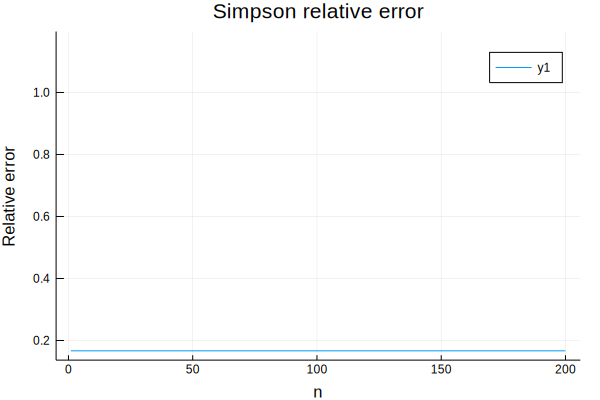

In [30]:
plot(simpson_g_results[:n], 
     map(x->parse(Float64,x), simpson_g_results[:Relative_error]), 
     xlabel="n",
     ylabel="Relative error",
     title="Simpson relative error"
)